In [11]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model.fit(X_train, y_train, batch_size = 20, epochs = 200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 12s 10ms/step - loss: 2.2727 - accuracy: 0.4178 - val_loss: 2.2590 - val_accuracy: 0.4822
Epoch 2/200
450/450 [==============================] - 4s 8ms/step - loss: 1.7670 - accuracy: 0.5508 - val_loss: 1.7144 - val_accuracy: 0.5744
Epoch 3/200
450/450 [==============================] - 4s 8ms/step - loss: 1.5971 - accuracy: 0.5912 - val_loss: 1.5598 - val_accuracy: 0.6091
Epoch 4/200
450/450 [==============================] - 4s 8ms/step - loss: 1.4200 - accuracy: 0.6395 - val_loss: 1.4254 - val_accuracy: 0.6398
Epoch 5/200
450/450 [==============================] - 4s 8ms/step - loss: 1.2578 - accuracy: 0.6860 - val_loss: 1.3283 - val_accuracy: 0.6647
Epoch 6/200
450/450 [==============================] - 4s 8ms/step - loss: 1.1282 - accuracy: 0.7190 - val_loss: 1.2267 - val_accuracy: 0.6941
Epoch 7/200
450/450 [==============================] - 4s 9ms/step - loss: 1.0280 - accuracy: 0.7407 - val_loss: 1.1861 - val_accuracy: 0.70

In [8]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.2230 - accuracy: 0.7137
Test Accuracy: 0.7137


In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

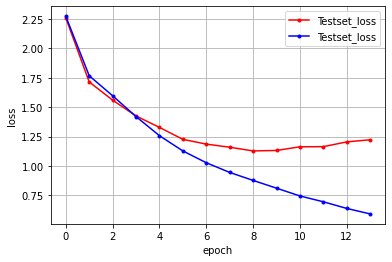

In [14]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Testset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()